In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from LB_D2Q9.dimensionless import opencl_dim as lb_cl

In [5]:
sns.set_style('ticks')

# Checking that refining resolution gives us the same result

We create simulations at different resolutions with the same Reynold's number.

In [56]:
D = 1.5 # meter
rho = 10. # kg/m^3
nu = 5. # Viscosity, m^2/s

pressure_grad = -3 # Pa/m

pipe_length = 2*D # meter

sim0 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=10, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.5
Characteristic T: 2.2360679775
Weinstein number: 0.201246117975
u_lb: 0.1
omega 0.0649050575147
2d global: (32, 32)
2d local: (32, 32)
3d global: (32, 32, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.063
outlet rho: 1.0


In [57]:
D = 1.5 # meter
rho = 10. # kg/m^3
nu = 5. # Viscosity, m^2/s

pressure_grad = -3 # Pa/m

pipe_length = 2*D # meter


sim1 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=50, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.5
Characteristic T: 2.2360679775
Weinstein number: 0.201246117975
u_lb: 0.02
omega 0.0649050575147
2d global: (128, 64)
2d local: (32, 32)
3d global: (128, 64, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.002424
outlet rho: 1.0


In [58]:
D = 1.5 # meter
rho = 10. # kg/m^3
nu = 5. # Viscosity, m^2/s

pressure_grad = -3 # Pa/m

pipe_length = 2*D # meter

sim2 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=100, time_prefactor=1,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.5
Characteristic T: 2.2360679775
Weinstein number: 0.201246117975
u_lb: 0.01
omega 0.0649050575147
2d global: (224, 128)
2d local: (32, 32)
3d global: (224, 128, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.000603
outlet rho: 1.0


We run each simulation for the same amount of time when approaching the steady state. This is a little tricky as each simulation has a different time step.

In [59]:
time_to_run = 10 # dimensionless time
num_steps = int(time_to_run/sim0.delta_t)
print 'Running for', num_steps

Running for 999


In [60]:
sim0.run(num_steps)

In [61]:
num_steps = int(time_to_run/sim1.delta_t)
print 'Running for', num_steps

Running for 25000


In [62]:
sim1.run(num_steps)

In [63]:
num_steps = int(time_to_run/sim2.delta_t)
print 'Running for', num_steps

Running for 100000


In [64]:
sim2.run(num_steps)

We now plot each simulation's solution to make sure that they look the same.

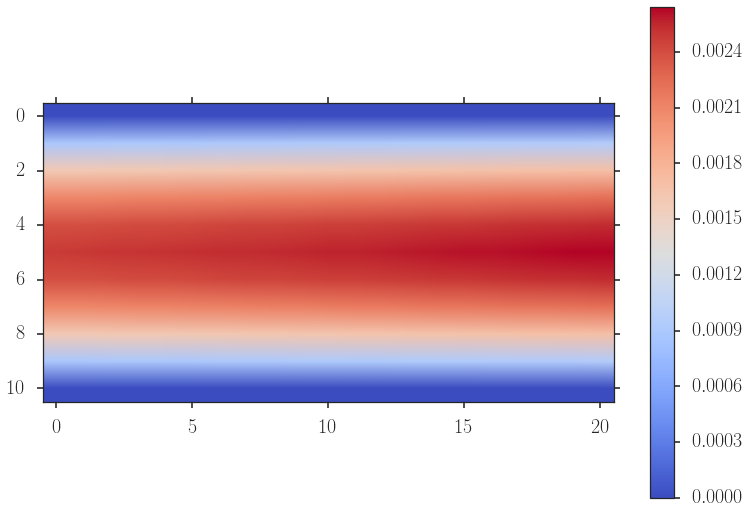

In [65]:
fields = sim0.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

RUH ROH lol

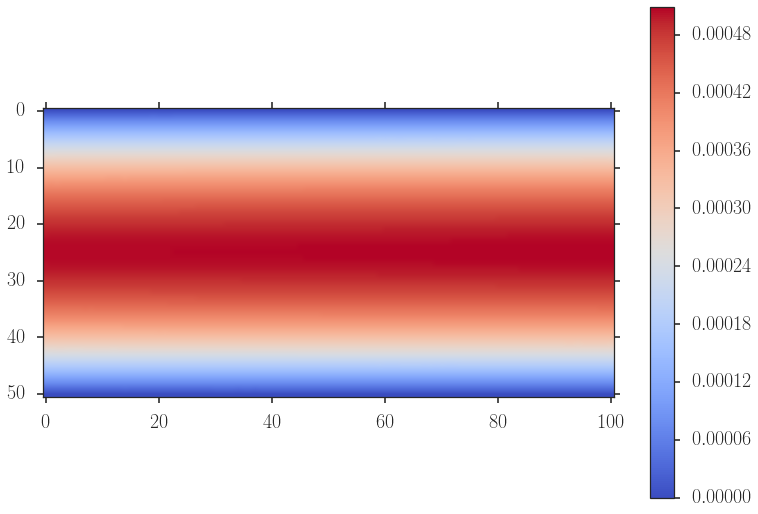

In [66]:
fields = sim1.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

RUH ROH LOLOLOLOLOLOL

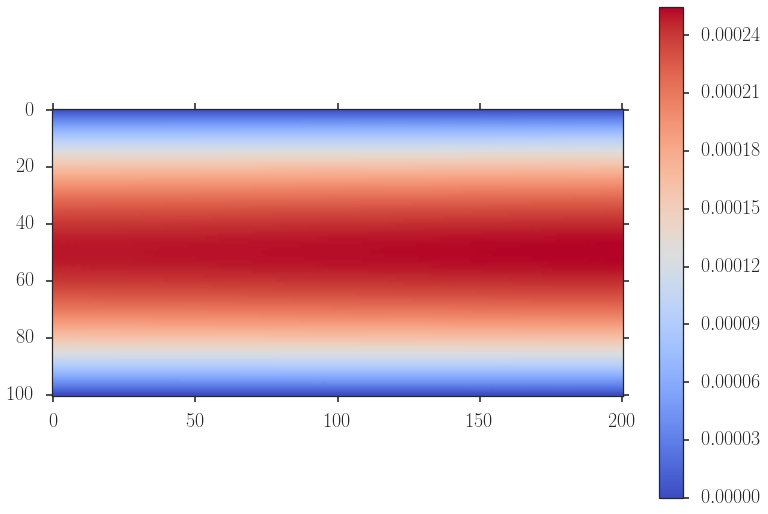

In [67]:
fields = sim2.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

This still looks super wacky. Not sure why...

We make a plot of our pipe flow solution. sim2 is the highest resolution and consequently looks the best!

In [68]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

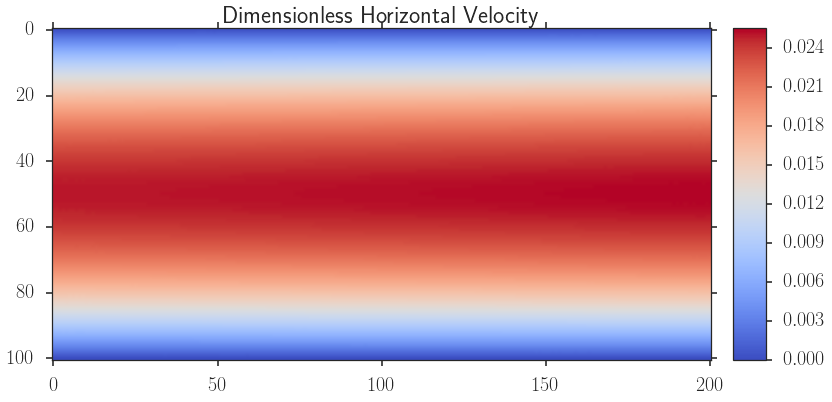

In [69]:
fields = sim2.get_nondim_fields()
im = plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)
plt.title('Dimensionless Horizontal Velocity')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='5%', pad=0.3)
plt.colorbar(im, cax=cax)

plt.savefig('standard_pipe_flow.png', dpi=200, bbox_inches='tight')

In [70]:
sns.set_style('ticks')

In [71]:
import matplotlib

In [72]:
matplotlib.rc('text', usetex=True)

We now compare our simulations with theory.

Yeah. Our Bc on the wall doesn't look right...negative velocity on the wall? lol

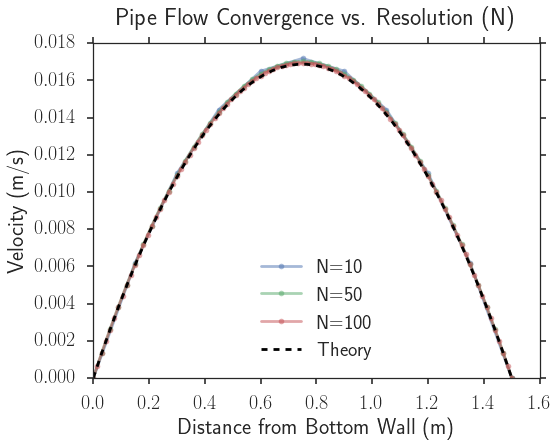

In [75]:
fields0 = sim0.get_physical_fields()
fields1 = sim1.get_physical_fields()
fields2 = sim2.get_physical_fields()

x_values = np.arange(fields0['u'].T.shape[0])*sim0.delta_x*sim0.L
# Get the mean velocity in the x direction
mean_u = fields0['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=10', ls='-', marker='.', alpha=0.5)


x_values = np.arange(fields1['u'].T.shape[0])*sim1.delta_x*sim1.L
# Get the mean velocity in the x direction
mean_u = fields1['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=50', ls='-', marker='.', alpha=0.5)

x_values = np.arange(fields2['u'].T.shape[0])*sim2.delta_x*sim2.L
mean_u = fields2['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=100', ls='-', marker='.', alpha=0.5)

prefactor = (1./(2*rho*nu))*pressure_grad
y = np.linspace(0, D)

predicted = prefactor*y*(y-D)
# Convert non-dim predicted

plt.plot(y, predicted, label='Theory', color='Black', ls='--')

plt.xlabel('Distance from Bottom Wall (m)')
plt.ylabel('Velocity (m/s)')

plt.title('Pipe Flow Convergence vs. Resolution (N)', y=1.04)

plt.legend(loc='best')

plt.gcf().set_size_inches(8, 6)

#plt.ylim(0, .06)

plt.savefig('resolution_convergence.png', dpi=200, bbox_inches='tight')

Beautiful. Can we plot the average error vs N?

In [79]:
predicted.shape

(50,)

In [85]:
error.mean()

4.5955034277325133e-08

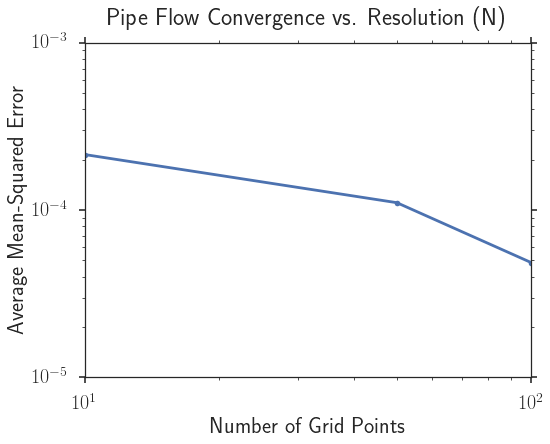

In [92]:
# Predicted
prefactor = (1./(2*rho*nu))*pressure_grad
y = np.linspace(0, D)
predicted = prefactor*y*(y-D)

# Compare the error
fields0 = sim0.get_physical_fields()
fields1 = sim1.get_physical_fields()
fields2 = sim2.get_physical_fields()

x_values = np.arange(fields0['u'].T.shape[0])*sim0.delta_x*sim0.L
# Get the mean velocity in the x direction
mean_u = fields0['u'].T.mean(axis=1)
error1 = (mean_u - prefactor*x_values*(x_values - D))**2
error1 = np.sqrt(error1.mean())

x_values = np.arange(fields1['u'].T.shape[0])*sim1.delta_x*sim1.L
# Get the mean velocity in the x direction
mean_u = fields1['u'].T.mean(axis=1)
error2 = (mean_u - prefactor*x_values*(x_values - D))**2
error2 = np.sqrt(error2.mean())

x_values = np.arange(fields2['u'].T.shape[0])*sim2.delta_x*sim2.L
mean_u = fields2['u'].T.mean(axis=1)
error3 = (mean_u - prefactor*x_values*(x_values - D))**2
error3 = np.sqrt(error3.mean())

plt.loglog([10, 50, 100], [error1, error2, error3], ls='-', marker='.')

#plt.loglog(y, predicted, label='Theory', color='Black', ls='--')

plt.xlabel('Number of Grid Points')
plt.ylabel('Average Mean-Squared Error')

plt.title('Pipe Flow Convergence vs. Resolution (N)', y=1.04)

plt.legend(loc='best')

plt.gcf().set_size_inches(8, 6)

#plt.ylim(0, .06)

#plt.savefig('resolution_convergence.png', dpi=200, bbox_inches='tight')